### Problem Statement

Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:
* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Performance Measures
* Root Mean Square Error (RMSE) 
* R2 score
* Mean Absolute Error (MAE)

### Data Preprocessing

### Importing required Libraries and Data

In [121]:
import numpy as np
import pandas as pd
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

### Importing data

In [122]:
# Importing file

data = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [123]:
# Create a Test Set (To avoid data snooping bias)

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

### EDA (Understanding the data)

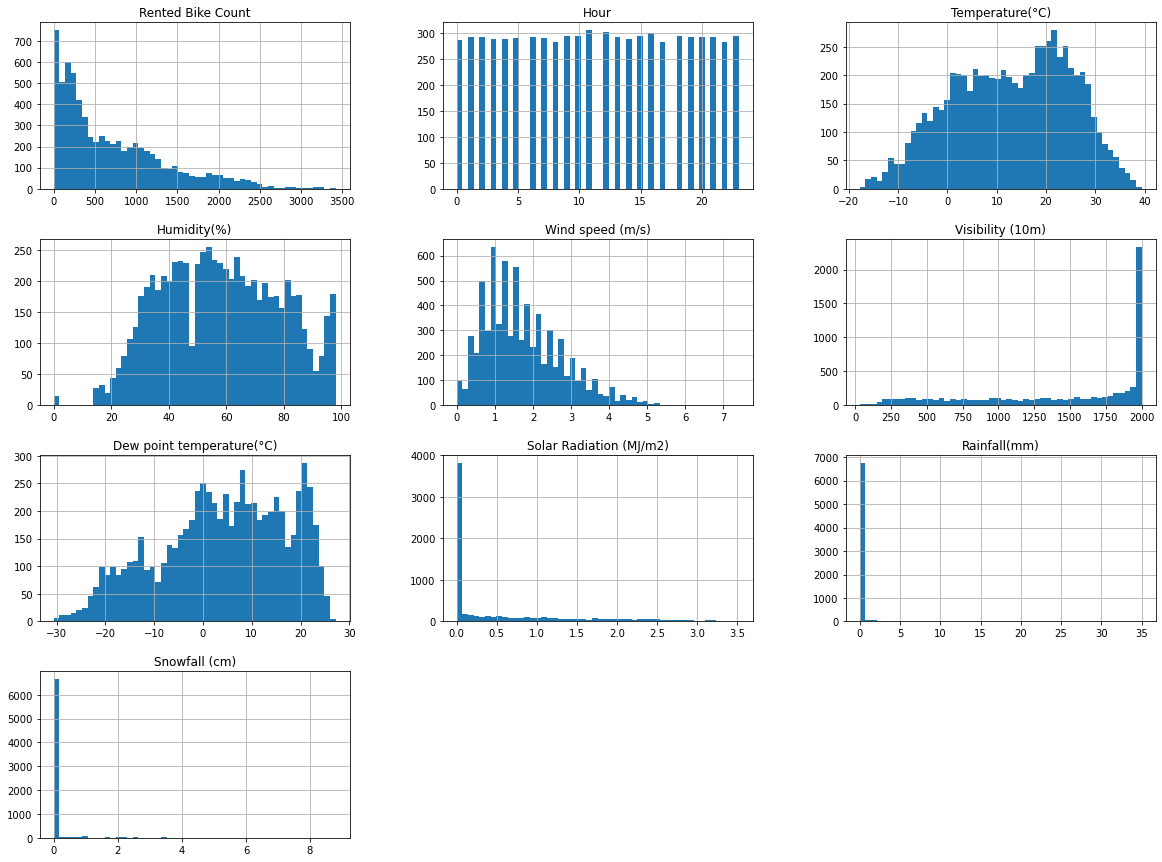

In [124]:
# Check missing values and duplicates
train.isna().sum()
train.duplicated().sum() # No missing values and duplicates

# Details about numerical data
train.describe()

# Checking with histogram
train.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

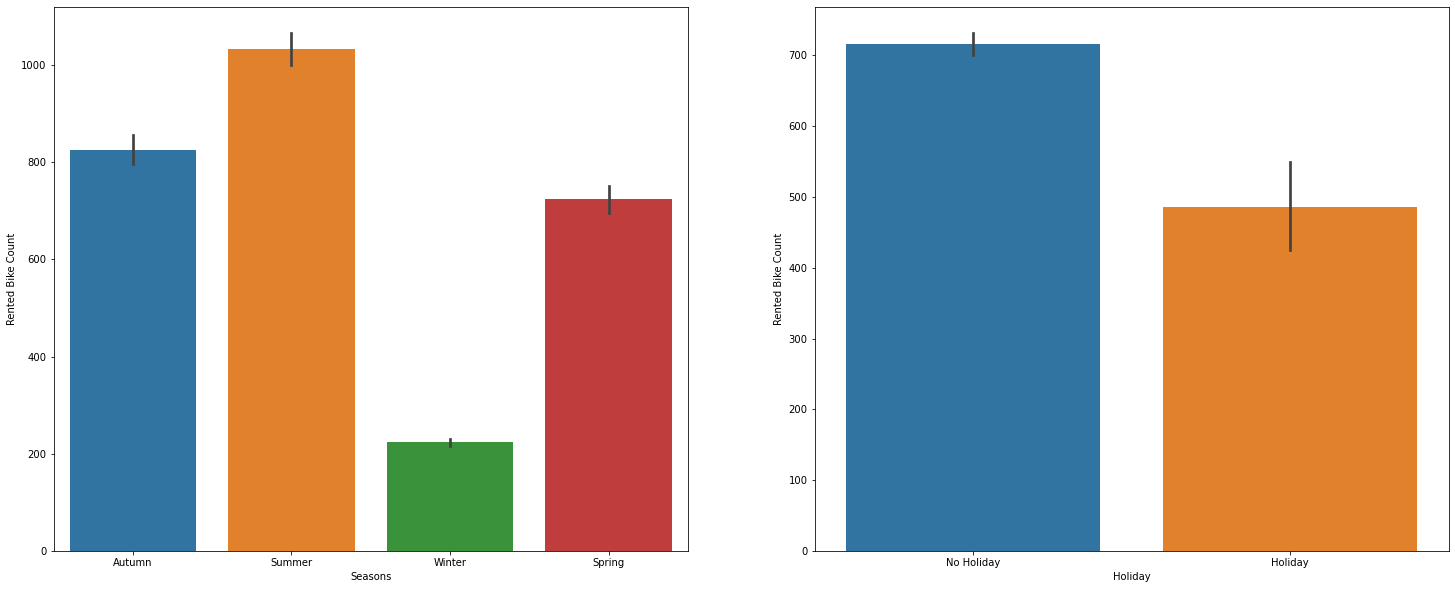

In [125]:
# Bivariate analysis 
# Rented Bike Count with respect to Seasons and Holiday

plt.subplots(figsize=(25,10))
plt.subplot(121)
sns.barplot(data=train, x="Seasons", y="Rented Bike Count")
plt.subplot(122)
sns.barplot(data=train, x="Holiday", y="Rented Bike Count")

# Summer and Autumn has more bike usage, Bikes are used more during working days.

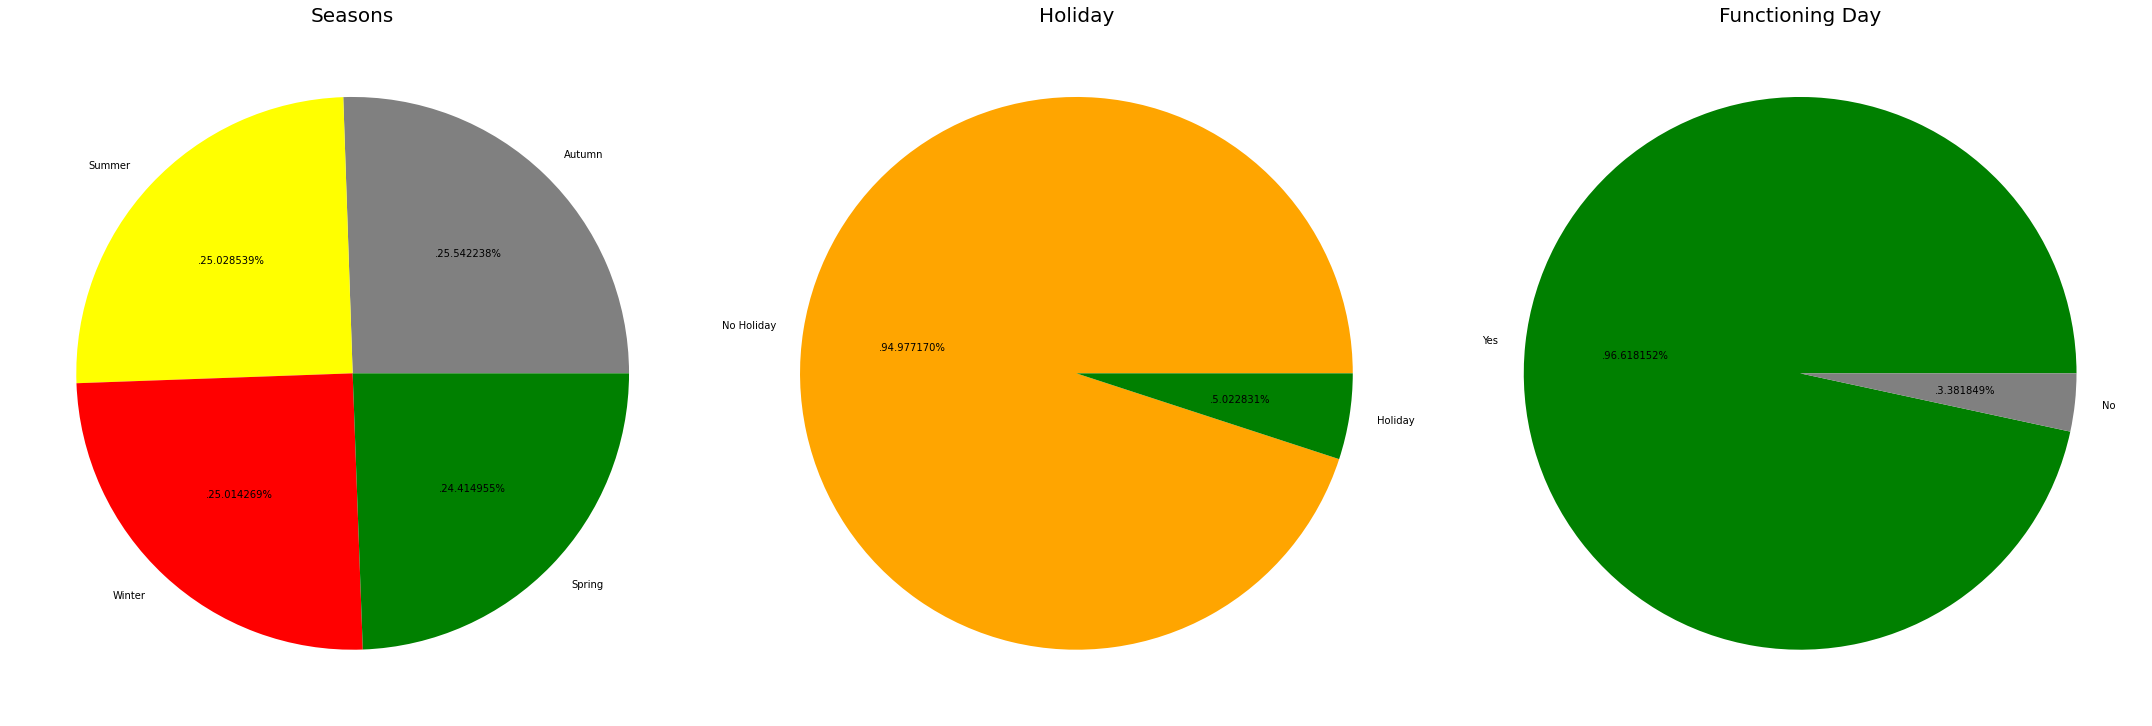

In [126]:
# Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 3, 1)
size = train['Seasons'].value_counts()
labels = 'Autumn', 'Summer', 'Winter', 'Spring'
color = ['grey','yellow','red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Seasons', fontsize = 20)
plt.axis('off')

plt.subplot(1, 3, 2)
size = train['Holiday'].value_counts()
labels = 'No Holiday', 'Holiday'
color = ['orange','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Holiday', fontsize = 20)
plt.axis('off')

plt.subplot(1, 3, 3)
size = train['Functioning Day'].value_counts()
labels = 'Yes', 'No'
color = ['green','grey']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Functioning Day', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

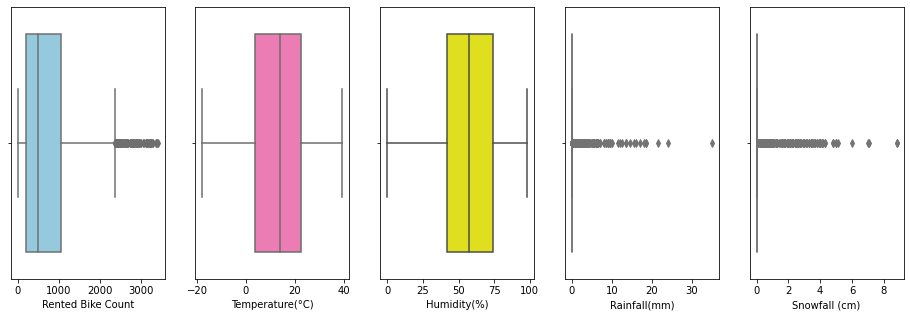

In [127]:
# Identifying Outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(151)
sns.boxplot(train['Rented Bike Count'],color='skyblue')
plt.subplot(152)
sns.boxplot(train['Temperature(°C)'],color='hotpink')
plt.subplot(153)
sns.boxplot(train['Humidity(%)'],color='yellow')
plt.subplot(154)
sns.boxplot(train['Rainfall(mm)'],color='lightgreen')
plt.subplot(155)
sns.boxplot(train['Snowfall (cm)'],color='lightgreen')
plt.show()

### Data preprocessing (Part 1)

In [128]:
# Reset indexes for train and test data
train.reset_index(drop='True',inplace=True)
test.reset_index(drop='True',inplace=True)

In [129]:
# Working with train data from here
# Convert date column from str to Timestamp

type(train["Date"][0]) # Finding datatype of date column, str

# Convert date column
train['Date'] = pd.to_datetime(train["Date"].iloc[0:], format='%d/%m/%Y') # Converts values into timestamp.

In [130]:
### Create checkpoint
df = train.copy()
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2018-11-16,995,15,13.2,61,3.9,719,5.8,1.03,0.0,0.0,Autumn,No Holiday,Yes
1,2018-06-29,1195,9,22.9,86,1.7,538,20.4,0.76,0.0,0.0,Summer,No Holiday,Yes
2,2018-11-15,1448,19,11.2,46,1.4,869,0.0,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,2018-02-02,178,23,-2.6,69,2.0,1434,-7.5,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2018-07-18,1980,22,27.2,73,1.5,1005,21.9,0.00,0.0,0.0,Summer,No Holiday,Yes


### Data preprocessing (Part 2)

In [131]:
# Feature encoding

dat_feat = df['Date']
cat_feat = df.loc[:,['Seasons','Holiday', 'Functioning Day']]
num_feat = df.loc[:,['Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)',
                     'Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)', 'Snowfall (cm)']]

In [132]:
# 1. Encoding categorical features (Holiday, Functioning Day)
cat = pd.get_dummies(df.loc[:,['Holiday', 'Functioning Day']])

# Adding to dataframe
df['Holiday'] = cat['Holiday_Holiday'] # 0 Not a Holiday, 1 means Holiday
df['Functioning Day'] = cat['Functioning Day_Yes'] # 1 is Yes, 0 is No

In [133]:
# 2. Encoding categorical features (Seasons)

from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

df['Seasons'] = lbl.fit_transform(df['Seasons'])

In [134]:
data = df.copy()

In [135]:
data['Month'] = pd.DatetimeIndex(df['Date']).month
data.drop('Date',axis=1,inplace=True)

In [136]:
final = data.copy()
final.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,995,15,13.2,61,3.9,719,5.8,1.03,0.0,0.0,0,0,1,11
1,1195,9,22.9,86,1.7,538,20.4,0.76,0.0,0.0,2,0,1,6
2,1448,19,11.2,46,1.4,869,0.0,0.00,0.0,0.0,0,0,1,11
3,178,23,-2.6,69,2.0,1434,-7.5,0.00,0.0,0.0,3,0,1,2
4,1980,22,27.2,73,1.5,1005,21.9,0.00,0.0,0.0,2,0,1,7


### Model

In [137]:
# Declaring X and y

X = final.drop('Rented Bike Count',axis=1)
y = final['Rented Bike Count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [138]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 431.0251
- Mean Absolute Error: 319.7072
- R2 Score: 0.5563
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 429.6551
- Mean Absolute Error: 326.1614
- R2 Score: 0.5433


Lasso
Model performance for Training set
- Root Mean Squared Error: 431.1022
- Mean Absolute Error: 319.5455
- R2 Score: 0.5561
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 429.3467
- Mean Absolute Error: 325.5720
- R2 Score: 0.5439


Ridge
Model performance for Training set
- Root Mean Squared Error: 431.0262
- Mean Absolute Error: 319.6867
- R2 Score: 0.5563
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 429.6221
- Mean Absolute Error: 326.0971
- R2 Score: 0.5433


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 354.1527
- Mean Absolute Error: 242.6344
- R2 Score: 0.

In [139]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model.score(X_test, y_test)

0.8743208971329561

* Random forest regressor performs well on test data at a score of 87.3%